In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, ifft, fftfreq
import scipy.signal as signal

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acovf

from scipy.signal import periodogram

In [25]:
datosIniciales = [0,2,4,6,8,10,8,60,2,4,6,8,10,8,6]

len(datosIniciales)

15

[68.         23.9015547  14.13075208 13.86016619 12.94123199 14.12038386
 10.25596018 78.80702403 25.58428118 14.72122524 13.8464426  13.29100933
 15.11300083 11.70019315 79.60960634 25.64381419 15.03738946 14.18399359
 12.6715551  14.51334558 11.44745654 79.01983564 26.02582908 15.12406503
 14.15444473 12.33085714 14.72430655 11.45002326 79.28818024 25.88215212
 15.01437031 13.66933717 13.21829378 14.54536794 10.17096118 78.2577172
 25.43535369 15.50869623 14.25883124 12.94261009 13.84236408  9.31311207
 77.69593195 25.2089855  15.52432004 13.89424799 12.1508953  13.7297095
  9.28389806 77.31674853 25.96616972 15.78846401 14.0302119  12.10610366
 13.35378022  8.96581993 76.43076637 25.80872625 15.74916174 14.05130927
 11.44300838 13.43217097  9.4474742  75.80964883 25.46989231 16.0260681
 13.77872715 11.70432537 13.12227474  9.4650986  75.17249112 25.04524021
 16.46844538 14.3031154  11.67983241 13.3786594   9.59019173 75.11836373
 25.28502251 16.26263617 14.2562233  11.13850746 13.40

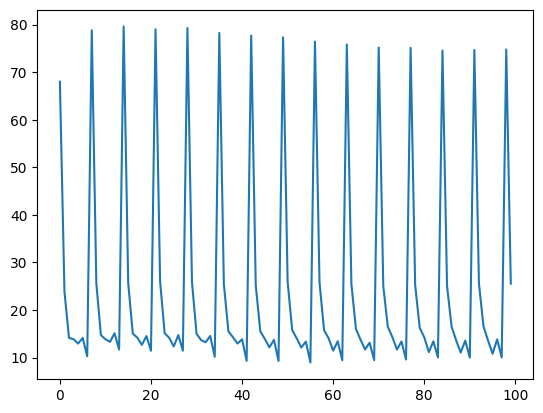

In [26]:


# Definimos el modelo SARIMAX con coeficientes AR, MA, SAR, SMA
mod = sm.tsa.SARIMAX(endog=[], order=(1, 0, 0), seasonal_order=(1, 1, 0, 7))

# Debemos incluir al menos 5 parámetros
params = [0.2, 0.05, 0.2, 0.1, 0.2]  # AR, MA, SAR, SMA, Constante (por ejemplo)

# Generamos 100 simulaciones
sim_data = mod.simulate(params=params, nsimulations=100, initial_state= datosIniciales)

print(sim_data)
plt.plot(sim_data)

In [18]:
sim_data.shape

(100,)

In [12]:
sim_data = sim_data.reshape(100,10)

In [19]:
sim_data


array([14.        , 15.29716245, 11.68058228,  7.20247514,  4.77117942,
        3.58750296,  4.36173248, 21.15536846, 16.09080436, 12.0544782 ,
        7.06315442,  5.15974397,  3.66069258,  4.48778679, 21.96471973,
       16.83743104, 11.80088562,  7.10710916,  5.17740308,  3.5771059 ,
        4.29171221, 21.77383616, 17.41990684, 11.95233699,  7.71760067,
        5.52680442,  3.23908972,  5.18682123, 22.3940157 , 17.11815713,
       11.74009145,  7.57708221,  5.52919711,  3.34831234,  5.50825575,
       22.27604719, 16.98818278, 11.66151997,  7.65217441,  5.20319057,
        3.06173834,  5.29604796, 22.40475029, 16.95604585, 11.11405726,
        7.24080313,  5.22787998,  3.18355903,  4.77889471, 22.20427991,
       16.33253859,  9.81465579,  6.50165281,  4.95739974,  3.60908584,
        4.97611452, 21.71963055, 16.04453758,  9.53260981,  5.43008347,
        4.30665265,  2.65468855,  4.87987978, 21.67490555, 16.51450975,
        9.02112914,  5.01202066,  4.73620508,  3.10192793,  3.81